In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import statsmodels.formula.api as smf

%matplotlib inline

In [6]:
# Read the Boston Data
data = pd.read_csv("datasets/ISLR/Boston.csv")
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [7]:
#Description of the Boston Data
# Boston dataset has 506 rows and 14 columns
# Columns are:
# crim: per capita crime rate by town
# zn: proportion of residential land zoned for lots over 250000 sqft
# indux: proportion of non-retail business acres per town
# chas: Charles River dummy variable(=1 if tract bounds river,  otherwise)
# nox: nitrogen oxides concentration(parts per 10 million)
# rm: average number of rooms per dwelling
# age: proportion of owner occupied units built prior to 1940
# dis: weighted mean of distances to five Boston Employment centers
# rad: index of accessibility to radial highways
# tax: full-value property-tax rate per $10K
# ptratio:  pupli-teacher ratio per town.
# black: 1000*(Bk -0.63)^2 where Bk is the proportion of blacks by town.
# lstat: lower status of the population(percent)
# medv: median value of owner occupied homes in $1000s

# Source:
# Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.
# Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.

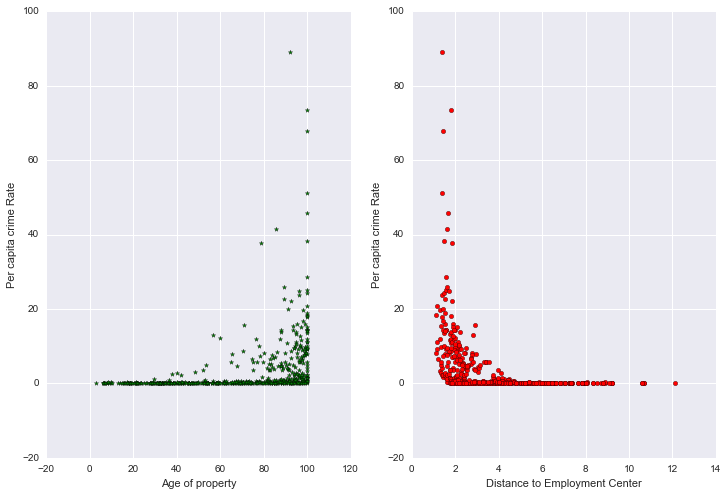

In [8]:
fig,axs = plt.subplots(1,2)
data.plot(kind = "scatter", x = "age", y = "crim", marker = '*',color ="green",ax= axs[0], figsize =(12,8))
axs[0].set_xlabel("Age of property")
axs[0].set_ylabel("Per capita crime Rate")

data.plot(kind = "scatter", x = "dis", y = "crim", color = "red", marker = 'o',ax= axs[1])
axs[1].set_xlabel("Distance to Employment Center")
axs[1].set_ylabel("Per capita crime Rate")

Graph on the left shows the relationship between the per capita crime rate 
and proportion of owner occupied units that are built prior to 1940. There seems to be higher rate of crime, when the community has older buildings.

Graph on the right shows come relationship between the per capita crime rate and the distance of the city/count to the five development centers.
Crime rate seems to be lower as the distance from Employment centers increase.


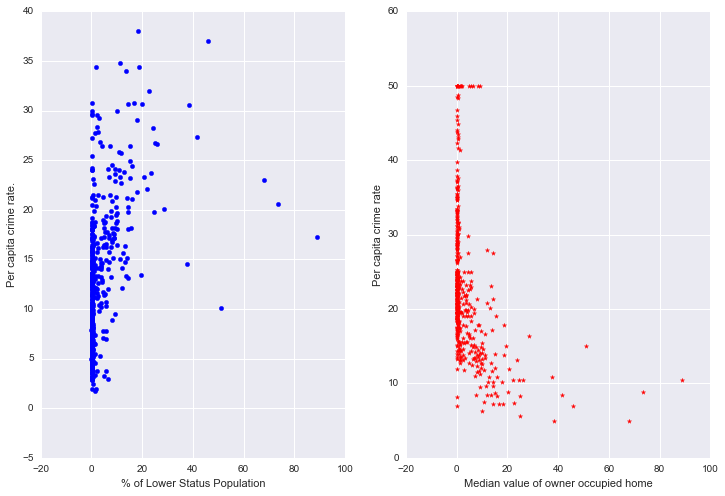

In [9]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize =(12,8))
ax1.scatter(data["crim"],data["lstat"], color = "blue", marker = "o")
ax1.set_xlabel("% of Lower Status Population")
ax1.set_ylabel("Per capita crime rate.")

ax2.scatter(data["crim"],data["medv"],color = "red", marker = "*" )
ax2.set_xlabel("Median value of owner occupied home")
ax2.set_ylabel("Per capita crime rate")



Graph on the left shows the relationship between the per capita crime rate and proportion of population being lower status population.

Graph on the right shows come relationship between the per capita crime rate and median value of the house. Crime rate seems to be lower as the median value of the houses increase.


## Multi-Linear Regression

In [10]:
import statsmodels.formula.api as smf
from sklearn.cross_validation import train_test_split

#Partition the data into test and training samples
trainBoston, testBoston = train_test_split(data, test_size=0.2)

In [11]:
#Verify the training and test splits
print("Training Data dimensions:", trainBoston.shape)
print("Test Data dimensions:", testBoston.shape)
trainBoston.head()

Training Data dimensions: (404, 14)
Test Data dimensions: (102, 14)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
150,1.65660,0.0,19.58,0,0.871,6.122,97.3,1.6180,5,403,14.7,372.80,14.10,21.5
219,0.11425,0.0,13.89,1,0.550,6.373,92.4,3.3633,5,276,16.4,393.74,10.50,23.0
270,0.29916,20.0,6.96,0,0.464,5.856,42.1,4.4290,3,223,18.6,388.65,13.00,21.1
251,0.21409,22.0,5.86,0,0.431,6.438,8.9,7.3967,7,330,19.1,377.07,3.59,24.8
440,22.05110,0.0,18.10,0,0.740,5.818,92.4,1.8662,24,666,20.2,391.45,22.11,10.5


In [12]:
#Applying Multi linear regression 
mlm = smf.ols(formula="crim~zn+indus+chas+nox+rm+age+dis+rad+tax+ptratio+black+lstat+medv", data = trainBoston)
mlmfit = mlm.fit()
mlmfit.params

Intercept    22.093815
zn            0.054274
indus        -0.053623
chas         -1.029807
nox         -13.662915
rm            0.264119
age           0.005598
dis          -1.154598
rad           0.628083
tax          -0.004190
ptratio      -0.324459
black        -0.007377
lstat         0.092162
medv         -0.233204
dtype: float64

The above table shows the the weighting of the various parameters as produced by the linear regression model. Lets look at a more detailed picture about the parameters and the associated confidence levels with the value.

In [13]:
mlmfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     24.04
Date:                Tue, 01 Nov 2016   Prob (F-statistic):           2.58e-42
Time:                        09:32:32   Log-Likelihood:                -1343.1
No. Observations:                 404   AIC:                             2714.
Df Residuals:                     390   BIC:                             2770.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     22.0938      8.953      2.468      0.014         4.492    39.696
zn             0.0543      0.023      2.337      0.020         0.009     0.100
indus         -0.0536      0.103     -0.521      0.602        -0.256     0.149
chas          -1.0298      1.472     -0.699      0.485        -3.925     1.865
nox          -13.6629      6.473     -2.111      0.035       -26.390    -0.936
rm             0.2641      0.743      0.355      0.723        -1.197     1.725
age            0.0056      0.022      0.258      0.797        -0.037     0.048
dis           -1.1546      0.350     -3.297      0.001        -1.843    -0.466
rad            0.6281      0.102      6.176      0.000         0.428     0.828
tax           -0.0042      0.006     -0.691      0.490        -0.016     0.008
ptratio       -0.3245      0.219     -1.478      0.140        -0.756     0.107
black         -0.0074      0.004     -1.665      0.097        -0.016     0.001
lstat          0.0922      0.093      0.990      0.323        -0.091     0.275
medv          -0.2332      0.071     -3.291      0.001        -0.373    -0.094
==============================================================================
Omnibus:                      533.765   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            59254.788
Skew:                           6.468   Prob(JB):                         0.00
Kurtosis:                      60.903   Cond. No.                     1.65e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Adj R.Squared of the model: 0.425
This implies that model accounts for ~43% of the error taking into account that there are 13 variables. Adj R.Squared = $1 - \frac {\frac{RSS}{n-d-1}}{\frac{TSS}{n-1}}$
- RSS = Residual Sum of Squares and 
- TSS = Total sum of squares for the response $\sum(y- \hat y)^2$ 

### P-Value: Ranges from 0.001 to 0.8
The t-statistic scores are not that high and hence the p-values are not low. For selecting a metric, we generally target a p-value of 0.05 or lower because that gives us 95% accuracy probability

### Significant factors:
From the model, it looks like the top 5 factors that could influence the per capita crime rates are:

- zn: proportion of residential land zoned for lots over 250000 sqft
- dis: weighted mean of distances to five Boston Employment centers
- rad: index of accessibility to radial highways
- medv: median value of owner occupied homes in $1000s

Next we will try to just build the model with these key variables. Then we will compare the result of the full model and the reduced model with the test data

In [14]:
#Prediction on the test data set.
predictTestBoston = mlmfit.predict(testBoston)
error = sum(np.square((predictTestBoston - testBoston["crim"])))

#Total Squared Error in the the Test set prediction
print("Prediction Error: ", error)


Prediction Error:  2211.97859406


In [15]:
#Applying Multi linear regression with reduced set of parameters
red_mlm = smf.ols(formula="crim~zn+rad+dis+medv", data = trainBoston)
red_mlmfit = red_mlm.fit()
red_mlmfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     73.27
Date:                Tue, 01 Nov 2016   Prob (F-statistic):           1.64e-46
Time:                        09:32:36   Log-Likelihood:                -1350.8
No. Observations:                 404   AIC:                             2712.
Df Residuals:                     399   BIC:                             2732.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      5.8615      1.659      3.533      0.000         2.600     9.123
zn             0.0647      0.021      3.053      0.002         0.023     0.106
rad            0.5112      0.049     10.459      0.000         0.415     0.607
dis           -0.7975      0.251     -3.179      0.002        -1.291    -0.304
medv          -0.2112      0.042     -5.006      0.000        -0.294    -0.128
==============================================================================
Omnibus:                      531.010   Durbin-Watson:                   2.122
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            55998.477
Skew:                           6.432   Prob(JB):                         0.00
Kurtosis:                      59.224   Cond. No.                         156.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Adj.R.Squared = 0.416 i.e with reduced set of variables, the model accounts for about 42% of error compared to Total Sum of Square error of the model.

The p-values of the features are fairly low indicating  higher confidence in the accuracy of these parameters. Let's calculate error on the training set

In [16]:
#Prediction on the test data set.
predictTestBoston = red_mlmfit.predict(testBoston)
error = sum(np.square((predictTestBoston - testBoston["crim"])))

#Total Squared Error in the the Test set prediction
print("Prediction Error: ", error)

Prediction Error:  2239.29896203


# Logistic Regression

Logistic regression is a classification algorithm which assigns a probability value for a data point to belong to a particular class. 

In our case, the Crim data is numerical. For this exercise, we will convert the numerical crim rate into a categorical field having three labels: 
- High Crime Rate:
- Medium Crime Rate:
- Low Crime Rate.

We will analyze the Boston Data Set to find out what constitutes a high, medium and low crime rates.

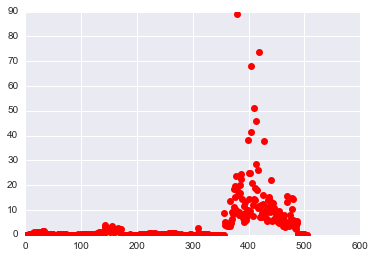

In [31]:
# Analysis of Boston Crime Rate.
crimBoston = data["crim"]
fig,ax = plt.subplots(1,1)
ax.plot(crimBoston, 'ro', x)
ax.set_xlabel("Row Number")
ax.set_ylable("Per Capita Crime rate")

This scatter plots shows the spread of the per capita crime rate. Lets look at some statistical measures of the crime rate

In [39]:
print("Maximum Crime Rate:", max(crimBoston))
print("Minimum Crime Rate:", min(crimBoston))
print("Average Crime Rate:", np.mean(crimBoston))
print("Median  Crime Rate:", np.median(crimBoston))

Maximum Crime Rate: 88.9762
Minimum Crime Rate: 0.00632
Average Crime Rate: 3.6135235573122535
Median  Crime Rate: 0.25651


The Average Crime per capita crime rate is very high compared to the median crime rate. This is because there are certains towns with very high per capita crime rate. Their data skews the average data. 

So we will use the following definitions:
If Per Capita Crime < Median, then it is a low crime rate area.
If Per Capita Crime > Median, then it is a high crime rate area.

For visualization, we will look at the plot of Per Capita Crime rate v.s Median House values and Distance of the town from the industrial center

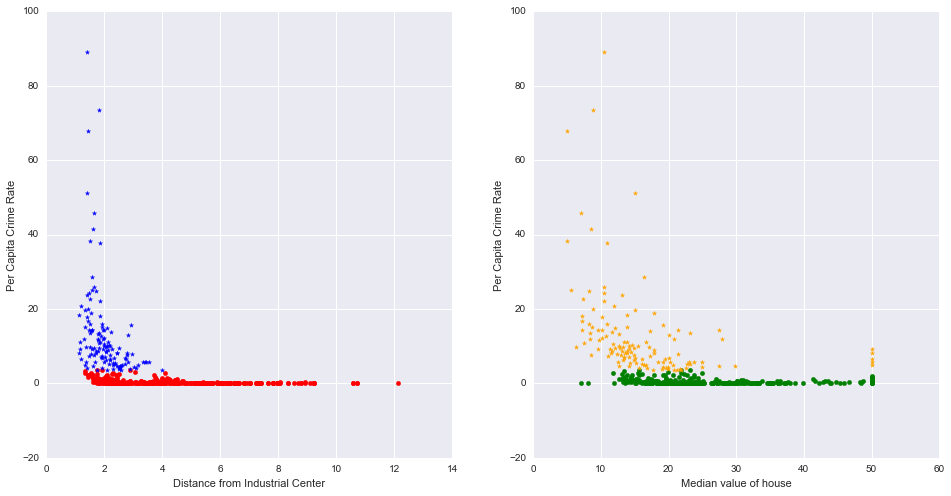

In [141]:
boston = data
fig,axs = plt.subplots(1,2, figsize=(16,8))
axs[0].scatter(boston[boston["boolCrim"]==0].dis,boston[boston["boolCrim"]==0].crim, color = "red", marker ="o" )
axs[0].scatter(boston[boston["boolCrim"]==1].dis,boston[boston["boolCrim"]==1].crim, color = "blue", marker = "*" )
axs[0].set_xlabel("Distance from Industrial Center")
axs[0].set_ylabel("Per Capita Crime Rate")
axs[1].scatter(boston[boston["boolCrim"]==0].medv,boston[boston["boolCrim"]==0].crim, color = "green", marker ="o" )
axs[1].scatter(boston[boston["boolCrim"]==1].medv,boston[boston["boolCrim"]==1].crim, color = "orange", marker = "*" )
axs[1].set_xlabel("Median value of house")
axs[1].set_ylabel("Per Capita Crime Rate")


In [144]:
#Factorizing the crime data and adding it to the dataframe
bostonCrim = np.zeros(len(boston["crim"]))
bostonCrim = pd.Series(bostonCrim)
bostonCrim[boston["crim"]>np.mean(crimBoston)]=1
bostonCrim[boston["crim"]<np.mean(crimBoston)]=0
boston["boolCrim"] = bostonCrim

#Partition the data into test and training samples
trainBoston, testBoston = train_test_split(boston, test_size=0.2)

In [145]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as qda
